In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import io
import csv
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from stats import mean, median, mode, multi_mode

In [3]:
url = "https://opendata.arcgis.com/datasets/8070cd333824453abea19e8faa340fb8_0.geojson"
response = requests.get(url).json()

with open('lightrail_data.txt', 'w') as outfile:
   json.dump(response, outfile)
with open('lightrail_data.txt') as rail_file:
   dict_rail = json.load(rail_file)

rail_data = pd.DataFrame.from_dict(json_normalize(dict_rail['features']), orient='columns')
rail_data.head()

,geometry.coordinates,geometry.type,properties.Image,properties.Image2,properties.Jurisdiction,properties.OBJECTID,properties.Q2015_1,properties.Q2015_2,properties.Q2015_3,properties.Q2015_4,...,properties.Q2017_1,properties.Q2017_2,properties.Q2017_3,properties.Q2017_4,properties.Q2018_1,properties.Q2106_3,properties.StationId,properties.StationName,properties.Type,type
0,"[-112.09973100877106, 33.520591853930384]",Point,https://farm2.staticflickr.com/1497/2398469244...,None,Phoenix,1,3825,3503,2416,3405,...,2151,2006,1883,2023,2064,2144,4,Montebello / 19th Ave,Boardings,Feature
1,"[-112.09880709341047, 33.50954306712032]",Point,https://farm6.staticflickr.com/5699/2406729541...,https://farm2.staticflickr.com/1466/2377613002...,Phoenix,2,1901,1773,1280,1935,...,2059,2000,1956,1996,2042,1979,5,19th Avenue / Camelback,Boardings,Feature
2,"[-112.08333617468192, 33.50930816892451]",Point,https://farm2.staticflickr.com/1534/2404118622...,None,Phoenix,3,1059,1017,753,1127,...,1246,1145,1087,1132,1063,1185,6,7th Avenue / Camelback,Boardings,Feature
3,"[-112.07378741844016, 33.49575408516081]",Point,https://farm2.staticflickr.com/1451/2395913915...,None,Phoenix,4,1674,1530,1049,1574,...,1638,1528,1378,1532,1482,1575,9,Indian School / Central Avenue,Boardings,Feature
4,"[-112.0737858926613, 33.501409885351514]",Point,https://farm2.staticflickr.com/1636/2343905835...,None,Phoenix,5,956,806,700,903,...,921,803,791,906,882,826,8,Campbell / Central Avenue,Boardings,Feature


In [4]:
# Reorganizing the columns using double brackets
organized_rail_df = rail_data[['properties.StationName', 
                               'properties.Q2015_1', 
                               'properties.Q2015_2', 
                               'properties.Q2015_3', 
                               'properties.Q2015_4', 
                               'properties.Q2016_1',
                               'properties.Q2016_2',
                               'properties.Q2106_3',
                               'properties.Q2016_4',
                               'properties.Q2017_1',
                               'properties.Q2017_2',
                               'properties.Q2017_3',
                               'properties.Q2017_4',
                               'properties.Q2018_1',
                               'geometry.coordinates', 
                               'properties.Jurisdiction',
                               'properties.Type']]
organized_rail_df.head()

,properties.StationName,properties.Q2015_1,properties.Q2015_2,properties.Q2015_3,properties.Q2015_4,properties.Q2016_1,properties.Q2016_2,properties.Q2106_3,properties.Q2016_4,properties.Q2017_1,properties.Q2017_2,properties.Q2017_3,properties.Q2017_4,properties.Q2018_1,geometry.coordinates,properties.Jurisdiction,properties.Type
0,Montebello / 19th Ave,3825,3503,2416,3405,3268,2126,2144,2197,2151,2006,1883,2023,2064,"[-112.09973100877106, 33.520591853930384]",Phoenix,Boardings
1,19th Avenue / Camelback,1901,1773,1280,1935,1951,1936,1979,2018,2059,2000,1956,1996,2042,"[-112.09880709341047, 33.50954306712032]",Phoenix,Boardings
2,7th Avenue / Camelback,1059,1017,753,1127,1128,1148,1185,1243,1246,1145,1087,1132,1063,"[-112.08333617468192, 33.50930816892451]",Phoenix,Boardings
3,Indian School / Central Avenue,1674,1530,1049,1574,1673,1646,1575,1617,1638,1528,1378,1532,1482,"[-112.07378741844016, 33.49575408516081]",Phoenix,Boardings
4,Campbell / Central Avenue,956,806,700,903,933,777,826,932,921,803,791,906,882,"[-112.0737858926613, 33.501409885351514]",Phoenix,Boardings


In [5]:
renamed_rail_df = organized_rail_df.rename(columns={'properties.StationName': 'Station Name', 
                                               'properties.Q2015_1': '2015 Q1', 
                                               'properties.Q2015_2': '2015 Q2', 
                                               'properties.Q2015_3': '2015 Q3', 
                                               'properties.Q2015_4': '2015 Q4', 
                                               'properties.Q2016_1': '2016 Q1',
                                               'properties.Q2016_2': '2016 Q2',
                                               'properties.Q2106_3': '2016 Q3',
                                               'properties.Q2016_4': '2016 Q4',
                                               'properties.Q2017_1': '2017 Q1',
                                               'properties.Q2017_2': '2017 Q2',
                                               'properties.Q2017_3': '2017 Q3',
                                               'properties.Q2017_4': '2017 Q4',
                                               'properties.Q2018_1': '2018 Q4',
                                               'geometry.coordinates': 'Stop Locations', 
                                               'properties.Jurisdiction': 'Local Municipality',
                                               'properties.Type': 'Eastbound or Westbound'})
renamed_rail_df.head()

,Station Name,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,2016 Q2,2016 Q3,2016 Q4,2017 Q1,2017 Q2,2017 Q3,2017 Q4,2018 Q4,Stop Locations,Local Municipality,Eastbound or Westbound
0,Montebello / 19th Ave,3825,3503,2416,3405,3268,2126,2144,2197,2151,2006,1883,2023,2064,"[-112.09973100877106, 33.520591853930384]",Phoenix,Boardings
1,19th Avenue / Camelback,1901,1773,1280,1935,1951,1936,1979,2018,2059,2000,1956,1996,2042,"[-112.09880709341047, 33.50954306712032]",Phoenix,Boardings
2,7th Avenue / Camelback,1059,1017,753,1127,1128,1148,1185,1243,1246,1145,1087,1132,1063,"[-112.08333617468192, 33.50930816892451]",Phoenix,Boardings
3,Indian School / Central Avenue,1674,1530,1049,1574,1673,1646,1575,1617,1638,1528,1378,1532,1482,"[-112.07378741844016, 33.49575408516081]",Phoenix,Boardings
4,Campbell / Central Avenue,956,806,700,903,933,777,826,932,921,803,791,906,882,"[-112.0737858926613, 33.501409885351514]",Phoenix,Boardings


In [6]:
# Replacing Boadrings and Departures with proper directional naming conventions
renamed_rail_df.loc[:,'Eastbound or Westbound'] = renamed_rail_df['Eastbound or Westbound'].str.replace('Boardings', 'Eastbound').str.replace('Departures', 'Westbound')  
renamed_rail_df

,Station Name,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,2016 Q2,2016 Q3,2016 Q4,2017 Q1,2017 Q2,2017 Q3,2017 Q4,2018 Q4,Stop Locations,Local Municipality,Eastbound or Westbound
0,Montebello / 19th Ave,3825,3503,2416,3405,3268,2126,2144,2197,2151,2006,1883,2023,2064,"[-112.09973100877106, 33.520591853930384]",Phoenix,Eastbound
1,19th Avenue / Camelback,1901,1773,1280,1935,1951,1936,1979,2018,2059,2000,1956,1996,2042,"[-112.09880709341047, 33.50954306712032]",Phoenix,Eastbound
2,7th Avenue / Camelback,1059,1017,753,1127,1128,1148,1185,1243,1246,1145,1087,1132,1063,"[-112.08333617468192, 33.50930816892451]",Phoenix,Eastbound
3,Indian School / Central Avenue,1674,1530,1049,1574,1673,1646,1575,1617,1638,1528,1378,1532,1482,"[-112.07378741844016, 33.49575408516081]",Phoenix,Eastbound
4,Campbell / Central Avenue,956,806,700,903,933,777,826,932,921,803,791,906,882,"[-112.0737858926613, 33.501409885351514]",Phoenix,Eastbound
5,Osborne / Central Avenue,929,851,555,901,952,971,921,996,967,915,823,854,896,"[-112.07380687251717, 33.48686130213215]",Phoenix,Eastbound
6,Thomas / Central Avenue,1484,1375,945,1427,1503,1470,1400,1464,1490,1442,1301,1373,1503,"[-112.07377158381105, 33.48122747629297]",Phoenix,Eastbound
7,Encanto / Central Avenue,579,473,317,529,578,553,530,533,575,525,449,443,502,"[-112.07381505209891, 33.47366705644302]",Phoenix,Eastbound
8,McDowell / Central Avenue,1778,1611,1142,1728,1797,1757,1714,1676,1736,1725,1191,1151,1184,"[-112.0738207196481, 33.46472523564417]",Phoenix,Eastbound
9,Dorsey / Apache Boulevard,886,709,529,829,811,704,735,754,767,676,704,756,775,"[-111.91688132468454, 33.41476036923345]",Tempe,Eastbound


In [7]:
# Removing brackets from geometry.coordinates, splitting into lat/lon columns
renamed_rail_df['Locations'] = renamed_rail_df['Stop Locations'].astype(str).str.replace('\[|\]','')

# # Creating lat/lon lists
lat = []
lon = []
for row in renamed_rail_df['Locations']:
   lat.append(row.split(',')[0])
   lon.append(row.split(',')[1])
    
# appending lat and lon data to new columns in dataframe
renamed_rail_df['Latitude'] = lat
renamed_rail_df['Longitude'] = lon

# Dropping unnecessary columns
renamed_rail_df = renamed_rail_df.drop(columns=['Stop Locations', 'Locations'])
renamed_rail_df.head()

,Station Name,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,2016 Q2,2016 Q3,2016 Q4,2017 Q1,2017 Q2,2017 Q3,2017 Q4,2018 Q4,Local Municipality,Eastbound or Westbound,Latitude,Longitude
0,Montebello / 19th Ave,3825,3503,2416,3405,3268,2126,2144,2197,2151,2006,1883,2023,2064,Phoenix,Eastbound,-112.09973100877106,33.520591853930384
1,19th Avenue / Camelback,1901,1773,1280,1935,1951,1936,1979,2018,2059,2000,1956,1996,2042,Phoenix,Eastbound,-112.09880709341047,33.50954306712032
2,7th Avenue / Camelback,1059,1017,753,1127,1128,1148,1185,1243,1246,1145,1087,1132,1063,Phoenix,Eastbound,-112.08333617468192,33.50930816892451
3,Indian School / Central Avenue,1674,1530,1049,1574,1673,1646,1575,1617,1638,1528,1378,1532,1482,Phoenix,Eastbound,-112.07378741844016,33.49575408516081
4,Campbell / Central Avenue,956,806,700,903,933,777,826,932,921,803,791,906,882,Phoenix,Eastbound,-112.0737858926613,33.501409885351514


In [8]:
# Which quarters do we see an increase in light rail riders from 2015 to 2017?
quarters = ['2015 Q1','2015 Q2','2015 Q3','2015 Q4','2016 Q1','2016 Q2','2016 Q3','2016 Q4','2017 Q1','2017 Q2','2017 Q3','2017 Q4',]

passenger_volume = []

passenger_volume.append(renamed_rail_df['2015 Q1'].sum())
passenger_volume.append(renamed_rail_df['2015 Q2'].sum())
passenger_volume.append(renamed_rail_df['2015 Q3'].sum())
passenger_volume.append(renamed_rail_df['2015 Q4'].sum())
passenger_volume.append(renamed_rail_df['2016 Q1'].sum())
passenger_volume.append(renamed_rail_df['2016 Q2'].sum())
passenger_volume.append(renamed_rail_df['2016 Q3'].sum())
passenger_volume.append(renamed_rail_df['2016 Q4'].sum())
passenger_volume.append(renamed_rail_df['2017 Q1'].sum())
passenger_volume.append(renamed_rail_df['2017 Q2'].sum())
passenger_volume.append(renamed_rail_df['2017 Q3'].sum())
passenger_volume.append(renamed_rail_df['2017 Q4'].sum())
passenger_volume
quarterly_riders_df = pd.DataFrame(quarters , passenger_volume)

quarter_totals = {'Quarters':quarters, 'Passenger Volume':passenger_volume}
quarter_totals_df = pd.DataFrame(quarter_totals)
quarter_totals_df

,Quarters,Passenger Volume
0,2015 Q1,88824
1,2015 Q2,75837
2,2015 Q3,61686
3,2015 Q4,88405
4,2016 Q1,89867
5,2016 Q2,91191
6,2016 Q3,90482
7,2016 Q4,92864
8,2017 Q1,95163
9,2017 Q2,91457


<IPython.core.display.Javascript object>


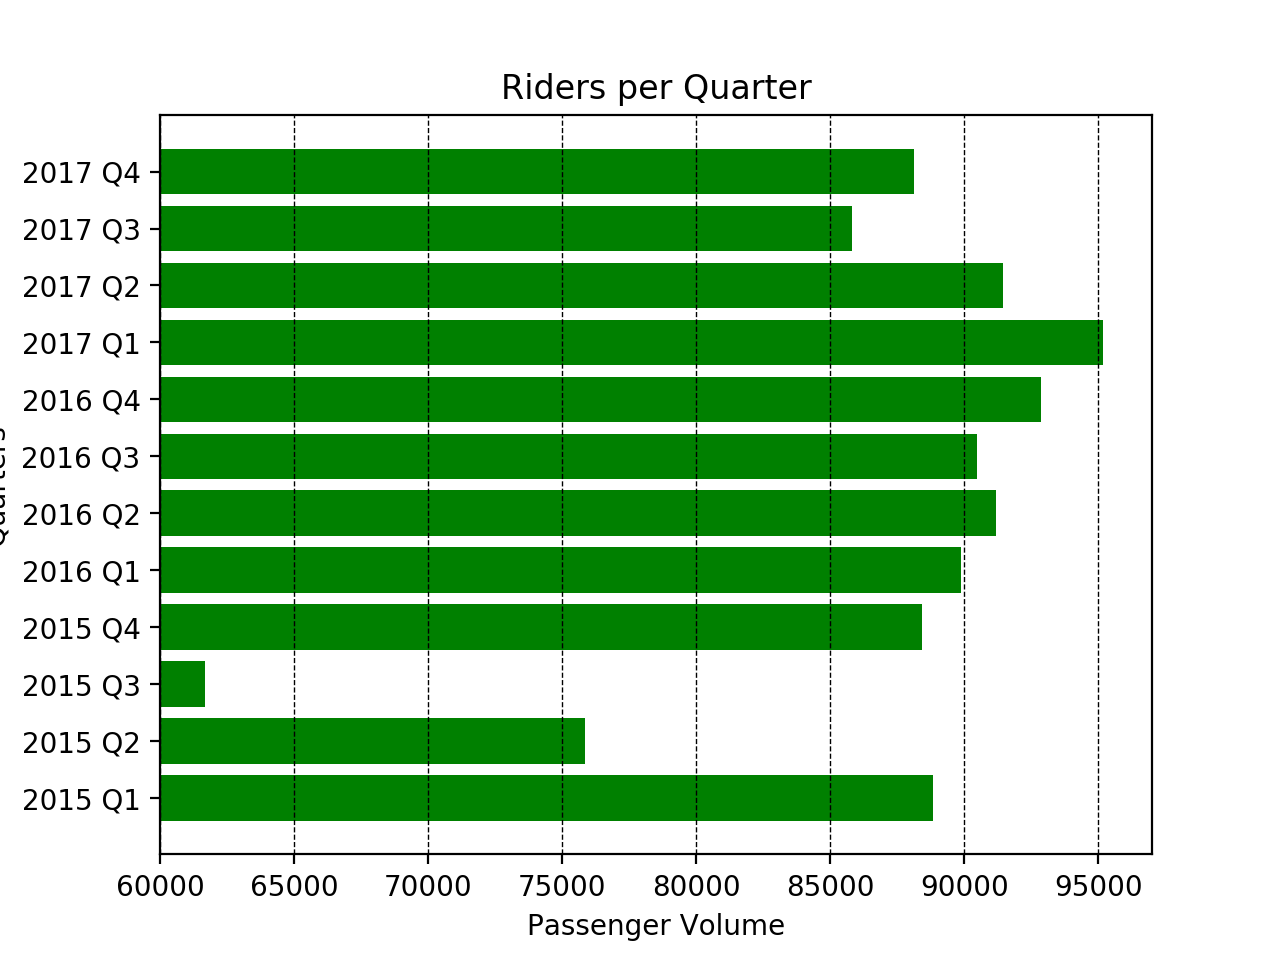

/Users/Lopez/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [9]:
# # Set x axis and tick locations
# x_axis = np.arange(len(quarter_totals_df))
# ##This is just copying the original list
# tick_locations = [value for value in x_axis]

# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(10,5))
# plt.bar(x_axis, quarter_totals_df['Passenger Volume'], color='g', alpha=0.5, align='center')
# plt.xticks(tick_locations, quarter_totals['Quarters'], rotation='vertical')

# # Set x and y limits
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(quarter_totals_df['Passenger Volume'])+1000)

# # Set a Title and labels
# plt.title('Riders per Quarter')
# plt.xlabel('Quarters')
# plt.ylabel('Passenger Volume')


x_pos = [i for i, _ in enumerate(quarters)]
plt.xlim(60000, 97000)

plt.barh(x_pos, passenger_volume, color='green')
plt.ylabel('Quarters')
plt.xlabel('Passenger Volume')
plt.title('Riders per Quarter')
ax = plt.axes()        
ax.xaxis.grid(linestyle='--', linewidth='0.5', color='black')

plt.yticks(x_pos, quarters)

plt.show()

In [10]:
# Getting data from API, turning into json file
url = "https://municipal.systems/v1/places/az/dataTypes/shared-vehicle/data?key=f867b00f-7408-4c88-bd4d-ad4ef582b20c"
response2 = requests.get(url).json()
# Creating a .txt file to be read into a dataframe
with open('bike_data.txt', 'w') as outfile2:
  json.dump(response2, outfile2)
with open('bike_data.txt') as bike_file:
  dict_bike = json.load(bike_file)
# Turning json file into a readable dataframe
bike_data = pd.DataFrame.from_dict(json_normalize(dict_bike['results']), orient='columns')
bike_data.head()
# Creating editable dataframe, formatting column names
bike_data_df = bike_data
bike_data_df.columns = bike_data_df.columns.str.strip().str.lower().str.replace('data.','')
# Dropping unnecessary columns
bike_data_df = bike_data_df[['name','geometry.coordinates','operators',]]
# Removing brackets from operators values, then dropping JUMP LA rows
# Inserting error removal, the below .loc line provides a "warning" that is
# a false positive, the data is still correct and what we are looking for
# See http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# and https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
# For further information
pd.options.mode.chained_assignment = None  # default='warn'
bike_data_df.loc[:,'operators'] = bike_data_df['operators'].str.get(0)
bike_data_df = bike_data_df[bike_data_df.operators != 'JUMP LA']
# Removing brackets from geometry.coordinates, splitting into lat/lon columns
bike_data_df['coordinates'] = bike_data_df['geometry.coordinates'].astype(str).str.replace('\[|\]','')
# # # Creating lat/lon lists
lat = []
lon = []
for row in bike_data_df['coordinates']:
   lat.append(row.split(',')[0])
   lon.append(row.split(',')[1])
# appending lat and lon data to new columns in dataframe
bike_data_df['latitude'] = lat
bike_data_df['longitude'] = lon
# # Dropping unnecessary columns
bike_data_df = bike_data_df[['name','operators','latitude','longitude']]
bike_data_df.head()

,name,operators,latitude,longitude
0,T759,Grid Bike Share,-111.938395,33.41814
1,GRID 2220,Grid Bike Share,-112.089135,33.46572
2,GRID 190,Grid Bike Share,-112.089142,33.465703
4,GRID 254,Grid Bike Share,-112.10143,33.447542999999996
5,T990,Grid Bike Share,-111.920858,33.416872


In [11]:
csv_bus_stops = "https://raw.githubusercontent.com/Sephka/Project1/master/Project_Folder/phx_city_data/bus_stops"
bus_stops_df = pd.read_csv(csv_bus_stops, encoding="utf-8")
reduced_df = bus_stops_df[["stop_id", "stop_name", "stop_lat", "stop_lon","district"]]
reduced_df.head()

,stop_id,stop_name,stop_lat,stop_lon,district
0,100,Bell Rd & 44th St,33.640488,-111.986041,PH
1,1002,Alice Av & 66th Dr,33.563533,-112.200947,GL
2,10021,3rd St & Taylor St,33.453121,-112.070083,PH
3,1003,Atlanta Av & 11th Av,33.400036,-112.085804,PH
4,1004,Baseline Rd & 19th Av,33.377644,-112.098529,PH


In [12]:
# Street closure data
csv_street_closures = "https://raw.githubusercontent.com/Sephka/Project1/Kristen/Project1Data/traffic-restrictions_planned-street-restrictions-and-closures_trstreets_20190928.csv"
street_closures_df = pd.read_csv(csv_street_closures, encoding="utf-8")
street_closures_df.head()
street_closures_df = street_closures_df[["LOCATION", "DATES", "CLOSURE TYPE", "PURPOSE",]]
street_closures_df = reduced_df.applymap(lambda s:s.lower() if type(s) == str else s)
street_closures_df.columns = map(str.lower, reduced_df.columns)
street_closures_df.columns = reduced_df.columns.str.replace(" ","_")
street_closures_df.head()

,stop_id,stop_name,stop_lat,stop_lon,district
0,100,bell rd & 44th st,33.640488,-111.986041,ph
1,1002,alice av & 66th dr,33.563533,-112.200947,gl
2,10021,3rd st & taylor st,33.453121,-112.070083,ph
3,1003,atlanta av & 11th av,33.400036,-112.085804,ph
4,1004,baseline rd & 19th av,33.377644,-112.098529,ph


In [13]:
# Intersection closure data
csv_intersection_closures = "https://raw.githubusercontent.com/Sephka/Project1/Kristen/Project1Data/traffic-restrictions_planned-intersection-restrictions-and-closures_trint_20190928.csv"
intersection_closures_df = pd.read_csv(csv_intersection_closures, encoding="utf-8")
intersection_closures_df.head()
intersection_closures_df = intersection_closures_df[["LOCATION", "DATES", "CLOSURE TYPE", "PURPOSE",]]
intersection_closures_df = intersection_closures_df.applymap(lambda s:s.lower() if type(s) == str else s)
intersection_closures_df.columns = map(str.lower,intersection_closures_df.columns)
intersection_closures_df.columns = intersection_closures_df.columns.str.replace(" ","_")
intersection_closures_df.head()

,location,dates,closure_type,purpose
0,56th st & mayo blvd,09-16-2019 - 09/27/2019,partial,street transportation work
1,mcdowell rd & 41st ave,09-06-2019 - 09/27/2019,partial,street transportation work
2,41st ave & mcdowell rd,09-06-2019 - 09/27/2019,partial,street transportation work
3,83rd ave & trafalgar ave,09-10-2019 - 09/27/2019,full,utility work
4,83rd ave & trafalgar ave,09-10-2019 - 09/27/2019,partial,utility work
